<a href="https://colab.research.google.com/github/madarasw/Hashnode/blob/main/Blog%20-%20ML%20Journey/Gradient_Descent_Made_Easy_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding Gradient Descent Through Simple Linear Regression

In this code, gradient descent is used to find the optimal parameters of a simple linear regression model.
The main goal is to understand the core concept of gradient descent, so all other aspects have been intentionally kept as simple as possible.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a simple dataset
X_train = np.array([5, 6, 2, 3, 4])
y_train = np.array([10, 14, 5, 6, 9])

'''
---------
| X | Y |
---------
| 5 | 10|
| 6 | 14|
| 2 | 5 |
| 3 | 6 |
| 4 | 9 |
---------
'''

In [4]:
b_init = 0
w_init = 0

In [5]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = X[i]*w + b
        loss = f_wb_i - y[i]
        cost = cost + loss**2
    cost = cost / (2 * m)
    return cost

# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost : {cost}')

Cost : 43.8


In [6]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        err = X[i]*w + b - y[i]
        dj_dw = dj_dw + err * X[i]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -8.8
dj_dw at initial w,b: -39.6


In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):


        J_history.append( cost_function(X, y, w, b))
        print(f"Iteration {i:4d}: Cost {J_history[-1]:8.4f}   ")

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    return w, b, J_history #return final w,b and J history for graphing

In [8]:
# initialize parameters
initial_w = 0.
initial_b = 0.
# some gradient descent settings
iterations = 20
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  43.8000   
Iteration    1: Cost  28.8986   
Iteration    2: Cost  19.0962   
Iteration    3: Cost  12.6481   
Iteration    4: Cost   8.4063   
Iteration    5: Cost   5.6161   
Iteration    6: Cost   3.7806   
Iteration    7: Cost   2.5731   
Iteration    8: Cost   1.7789   
Iteration    9: Cost   1.2564   
Iteration   10: Cost   0.9126   
Iteration   11: Cost   0.6865   
Iteration   12: Cost   0.5378   
Iteration   13: Cost   0.4399   
Iteration   14: Cost   0.3756   
Iteration   15: Cost   0.3332   
Iteration   16: Cost   0.3053   
Iteration   17: Cost   0.2870   
Iteration   18: Cost   0.2749   
Iteration   19: Cost   0.2669   
b,w found by gradient descent: 0.45,2.0657049918621646 


In [9]:
m = X_train.shape[0]
y_pred = [x*w_final + b_final for x in X_train]

for i in range(m):
    print(f"prediction: {y_pred[i]:0.2f}, target value: {y_train[i]}")

prediction: 10.78, target value: 10
prediction: 12.85, target value: 14
prediction: 4.58, target value: 5
prediction: 6.65, target value: 6
prediction: 8.71, target value: 9


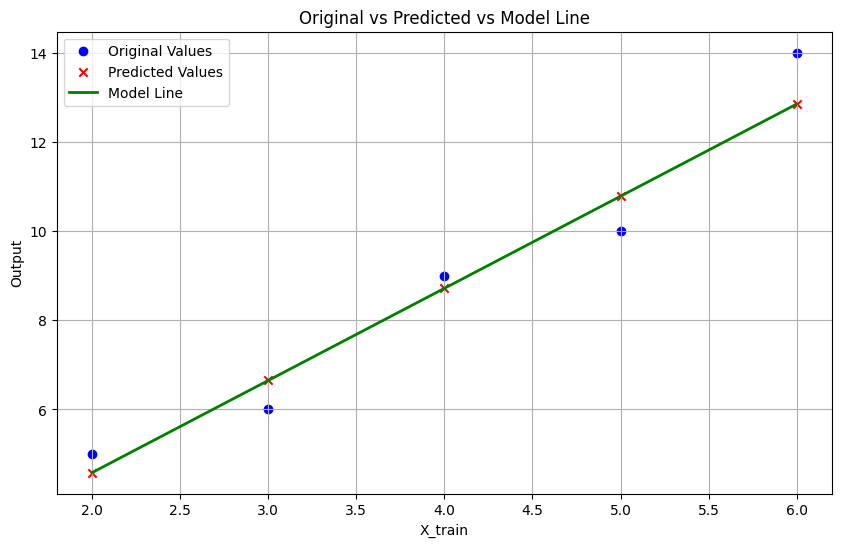

In [10]:
X_flat = X_train.flatten() if len(X_train.shape) > 1 else X_train

# Model line (smooth curve)
X_line = np.linspace(min(X_flat), max(X_flat), 100)
y_line = w_final * X_line + b_final  # model output line

plt.figure(figsize=(10, 6))

# Original data
plt.scatter(X_flat, y_train, color='blue', label='Original Values')

# Predicted values (on training data)
plt.scatter(X_flat, y_pred, color='red', marker='x', label='Predicted Values')

# Final model line
plt.plot(X_line, y_line, color='green', label='Model Line', linewidth=2)

plt.title('Original vs Predicted vs Model Line')
plt.xlabel('X_train')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()